ANALISI DIFFUSIONE COVID-19

Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce: Download our complete COVID-19 dataset".
Scaricare il dataset nel formato che si preferisce. 
1. Si richiede di verificare le dimensioni del dataset e i relativi metadati
2. Si chiede di trovare, per ogni continente:
   a. il numero di casi fin dall'inizio della pandemia
   b. la percentuale rispetto al totale mondiale del numero di casi
3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati:
    a. l'evoluzione dei casi totali dall'inizio alla fine dell'anno
    b. il numero di nuovi casi rispetto alla data
4. Riguardo le nazioni di Italia, Germania, Francia:
    a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da 
    maggio 2022 (incluso) ad aprile 2023 (incluso)
    b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante
5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:
    a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)
    b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzioni o meno

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Carico il dataset scaricato in formato csv
df = pd.read_csv("C:\\Users\\Letizia\\Desktop\\Leti\\owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


Prima di effettuare le analisi richieste, effettuo una esplorazione dei dati contenuti nel dataset

In [17]:
#Visualizzo un anteprima delle prime cinque righe del dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


Già dalla visualizzazione dell'anteprima con le cinque righe del dataset, si evince come molti campi presentino valori nulli.
Il dataset risulta presentare un gran numero di colonne, infatti non tutte riescono ad essere visualizzate a video.
A tal proposito, di seguito verranno visualizzate le informazioni generali per ogni singola colonna

In [18]:
#Visualizzo le informazioni generali per ogni singola colonna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

Dall’esplorazione delle informazioni generali sulle singole colonne, si può osservare che il dataset contiene un totale di 67 colonne.
Per ciascuna di esse è possibile visualizzare il tipo di dato presente, che è prevalentemente di tipo object, float e int. Un aspetto importante del dataset è che, su un totale di 429435 righe, solo quattro colonne non presentano valori nulli, mentre tutte le altre contengono dati mancanti.
Di seguito andiamo a calcolare i valori nulli contenuti in ciascuna colonna

In [19]:
#Calcolo  valori nulli per ciascuna colonna
df.isna().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

Da questo risultato, si può già vedere ciò che era emerso allo step precedente.
Utilizzando questo metodo però, non tutti i conteggi per ciascuna colonna viene mostrato, quindi meglio utilizzare un loop for per mostrare il calcolo per tutte le colonne

In [20]:
#Calcolo  valori nulli per ciascuna colonna utilizzando un cilo FOR al fine di riuscire a mostrare il calcolo per tutte le colonne 
for column in df.columns:
    conteggio_valori_nulli = df[column].isna().sum()
    print("La colonna", column, "contiene:", conteggio_valori_nulli, "valori nulli")
    

La colonna iso_code contiene: 0 valori nulli
La colonna continent contiene: 26525 valori nulli
La colonna location contiene: 0 valori nulli
La colonna date contiene: 0 valori nulli
La colonna total_cases contiene: 17631 valori nulli
La colonna new_cases contiene: 19276 valori nulli
La colonna new_cases_smoothed contiene: 20506 valori nulli
La colonna total_deaths contiene: 17631 valori nulli
La colonna new_deaths contiene: 18827 valori nulli
La colonna new_deaths_smoothed contiene: 20057 valori nulli
La colonna total_cases_per_million contiene: 17631 valori nulli
La colonna new_cases_per_million contiene: 19276 valori nulli
La colonna new_cases_smoothed_per_million contiene: 20506 valori nulli
La colonna total_deaths_per_million contiene: 17631 valori nulli
La colonna new_deaths_per_million contiene: 18827 valori nulli
La colonna new_deaths_smoothed_per_million contiene: 20057 valori nulli
La colonna reproduction_rate contiene: 244618 valori nulli
La colonna icu_patients contiene: 3903

Attraverso il loop for è possibile visualizzare esattamente, per tutte le colonne, il totale dei valori nulli contenute in esse. Come anticipato in precedenza, solo
quattro di queste non contengono valori nulli. Le colonne che presentano la totalità dei dati sono: iso_code, location, date e population.
Evidenziati i valori nulli, si effettua una esplorazione a livello statistico delle colonne numeriche

In [21]:
#Analisi a livello statistico delle colonne numeriche
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [22]:
#Analisi delle colonne categoriche
for column in df.columns:
    if df[column].dtype == "object":
        print ("La colonna", column, "contiene dati categorici")
        unique_count = df[column].nunique()
        print("La colonna", column, "contiene", unique_count, "valori unici")
        all_count = df[column].value_counts()
        print ("La distribuzione di ogni valore unico è")
        print(all_count)
        print()

La colonna iso_code contiene dati categorici
La colonna iso_code contiene 255 valori unici
La distribuzione di ogni valore unico è
iso_code
OWID_HIC    3026
OWID_EUN    3024
OWID_UMC    3013
OWID_LMC    2983
OWID_LIC    2724
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64

La colonna continent contiene dati categorici
La colonna continent contiene 6 valori unici
La distribuzione di ogni valore unico è
continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

La colonna location contiene dati categorici
La colonna location contiene 255 valori unici
La distribuzione di ogni valore unico è
location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             27

Una osservazione importante da effettuare sulla base di quanto restituito in output, sono i valori contenuti nella colonna "location". 
Sulla base delle informazioni contenute dalla fonte del dataset, questo campo dovrebbe contenere la nazione.
Si può osservare però che il campo presenta sia dati puntuali, sia dati aggregati, infatti, come si vede dall'output, alcuni paesi vengono raggruppati nelle seguenti categorie: 

- European Union (27),
- Upper-middle-incomecountries
- Lower-middle-income countries
- Low-income countries

Per queste righe si avrà quindi una informazione aggregata, e, non una informazione puntuale sulla singola nazione, proprio per il fatto che alcune nazioni sono state a loro volta suddivise nei gruppi riportati sopra.
Dato che non riesco a visualizzare a video la totalità delle informazioni contenute nel campo "location", effettuo un ulteriore controllo con il metodo unique, così da mostrare i valori unici del campo.

In [23]:
df["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

Osservando i valori unici, si può osservare una situazione interessante che non era emersa dall'output precedente in quanto non era possibile visualizzare tutti i valori contenuti nel campo.
All'interno di tale campo si ha anche una aggregazione per continente:
- Africa
- Asia
- Europe
- North America
- Oceania
- South America

Questa situazione sarà utile ai fini dell'analisi, poiché per studiare le informazioni aggregate per continente potremo utilizzare il campo location, che non contiene valori nulli, evitando così le problematiche legate alla mancanza di dati presenti invece nel campo continent.

Dopo aver esplorato il dataset e averne analizzato il contenuto, effettuo le analisi richieste.

1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [24]:
#Verifico le dimensioni del dataset
df.shape

(429435, 67)

Come già anticipato durante l'esplorazione, il dataset contiene un totale di 429435 righe per 67 colonne

In [25]:
#Osservo i metadati
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Sulla base delle richieste effettuate dal committente, i campi che serviranno principalmente nello svolgimento dell'analisi sono i seguenti:
- location: contiene le informazioni sulla nazione. Come già osservato sono presenti sia dati aggregati (come i continenti), sia dati puntuali
- date: contiene le informazioni sulle date in cui sono state effettuate le osservazioni
- total_cases: contiene le informazioni sul totale dei casi confermati di COVID-19. Possono includere anche i casi probabili
- new_cases: contiene le informazioni sui nuovi casi confermati di COVID-19. Possono includere anche i casi probabili. La fonte del dataset segnala che nei casi in cui si ha una variazione 
  giornaliera negativa dovuta a una correzione dei dati, l'indicatore viene impostato su NA
- icu patients: contiene le informazioni sul numero di pazienti affetti da COVID-19 ricoverati in unità di terapia intensiva in un determinato giorno
- hosp_patients: contiene le informazioni sul numero di pazienti affetti da COVID-19 ricoverati in ospedale in un determinato giorno

2. Si chiede di trovare, per ogni continente:
   a. il numero di casi fin dall'inizio della pandemia
   b. la percentuale rispetto al totale mondiale del numero di casi

In [ ]:
#Calcolo, per ciascun continente, il numero di casi fin dall'inizio della pandemia

In [26]:
#Filtro il dataset per analizzare solo le righe contenenti dati relativi ai continenti
filtro_continenti = df["location"].isin(["Africa", "Asia", "Europe", "North America", "Oceania", "South America"])
df_filtrato_continenti = df.loc[filtro_continenti]
df_filtrato_continenti

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1674,OWID_AFR,NaN,Africa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1675,OWID_AFR,NaN,Africa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1676,OWID_AFR,NaN,Africa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1677,OWID_AFR,NaN,Africa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1678,OWID_AFR,NaN,Africa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359233,OWID_SAM,NaN,South America,2024-07-31,68808110.0,0.0,205.714,1354186.0,0.0,0.571,...,NaN,NaN,NaN,NaN,NaN,436816679,NaN,NaN,NaN,NaN
359234,OWID_SAM,NaN,South America,2024-08-01,68808110.0,0.0,205.714,1354186.0,0.0,0.571,...,NaN,NaN,NaN,NaN,NaN,436816679,NaN,NaN,NaN,NaN
359235,OWID_SAM,NaN,South America,2024-08-02,68808110.0,0.0,205.714,1354186.0,0.0,0.571,...,NaN,NaN,NaN,NaN,NaN,436816679,NaN,NaN,NaN,NaN
359236,OWID_SAM,NaN,South America,2024-08-03,68808110.0,0.0,205.714,1354186.0,0.0,0.571,...,NaN,NaN,NaN,NaN,NaN,436816679,NaN,NaN,NaN,NaN


In [27]:
numero_casi_continente = df_filtrato_continenti.groupby("location")["new_cases"].sum()
numero_casi_continente.sort_values()

location
Africa            13146831.0
Oceania           15003468.0
South America     68811012.0
North America    124492698.0
Europe           252916868.0
Asia             301564180.0
Name: new_cases, dtype: float64

Per l'analisi ho utilizzato la colonna new_cases che contiene il numero di casi giornalieri. Questo perchè la colonna total_cases è cumulativa e quindi sarei andata a sommare più volte gli stessi casi.
Si evince che il continente che ha evidenziato più casi è l'Asia, seguito da Europa e Nord America, mentre i valori più bassi si registrano invece per Africa e Oceania.

In [ ]:
#Calcolo la percentuale di ciascun continente rispetto al totale mondiale del numero di casi

In [28]:
totale_mondiale = numero_casi_continente.sum()
totale_mondiale

775935057.0

In [ ]:
#Utilizzo un ciclo FOR così da non dover andare a calcolare le percentuali una alla volta

In [30]:
percentuali_continenti = []
for continente, casi in numero_casi_continente.items():
    percentuale = (casi / totale_mondiale) * 100
    percentuale = round(percentuale, 2)
    percentuali_continenti.append(percentuale)
    print("La percentuale del continente", continente, "rispetto al totale mondiale", totale_mondiale, "è:", percentuale, "%")

La percentuale del continente Africa rispetto al totale mondiale 775935057.0 è: 1.69 %
La percentuale del continente Asia rispetto al totale mondiale 775935057.0 è: 38.86 %
La percentuale del continente Europe rispetto al totale mondiale 775935057.0 è: 32.6 %
La percentuale del continente North America rispetto al totale mondiale 775935057.0 è: 16.04 %
La percentuale del continente Oceania rispetto al totale mondiale 775935057.0 è: 1.93 %
La percentuale del continente South America rispetto al totale mondiale 775935057.0 è: 8.87 %


Dal risultato si evince che il continente con la percentuale maggiore del numero di casi rispetto al totale mondiale è il continente Asia. Ciò significa che rispetto al totale mondiale dei casi,
il 39% è stato registrato in Asia. Il 32,6% in Europa e il 16,04% in Nord America. 
I due paesi in cui si erano registrati il minor numero di casi rappresentano il 1,93% (Oceania) e il 8,87% (Sud America) del totale mondiale.

3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati:
    a. l'evoluzione dei casi totali dall'inizio alla fine dell'anno
    b. il numero di nuovi casi rispetto alla data

In [ ]:
#Filtro il dataset per location Italia e anno 2022 e non considero i giorni che non hanno misurazioni

In [31]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN,2024
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN,2024
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN,2024
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN,2024


In [33]:
filtro_Italia = df["location"] == "Italy" 
filtro_2022 = df["year"] == 2022
filtro_non_nulli = df["new_cases"].notna()
filtro = filtro_Italia & filtro_2022 & filtro_non_nulli
df_filtrato = df.loc[filtro, ["date", "total_cases"]]
df_filtrato.set_index("date", inplace = True)
df_filtrato


,total_cases
date,
2022-01-01,5622431.0
2022-01-02,6267035.0
2022-01-03,6267035.0
2022-01-04,6267035.0
2022-01-05,6267035.0
...,...
2022-12-27,25060503.0
2022-12-28,25060503.0
2022-12-29,25060503.0


In [ ]:
#Rappresento con un grafico l'evoluzione dei casi totali dall'inizio alla fine dell'anno

Text(0, 0.5, 'Casi totali')

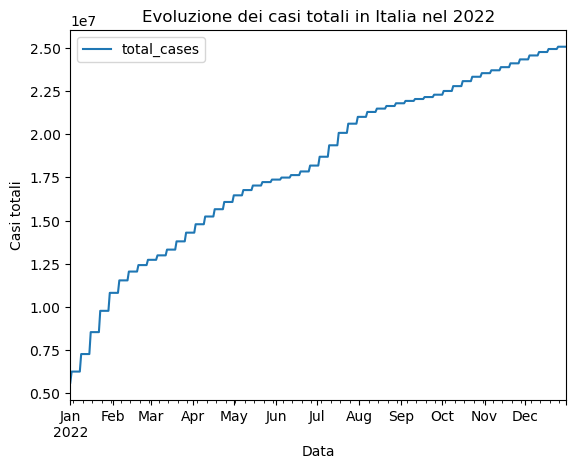

In [34]:
df_filtrato.plot()
plt.title("Evoluzione dei casi totali in Italia nel 2022")
plt.xlabel("Data")
plt.ylabel("Casi totali")

Il grafico mostra l'andamento dei casi totali di Covid-19 nell'arco temporale da gennaio 2022 a dicembre 2022.
Ho utilizzato un grafico a linee in quanto è il più adeguato per rappresentare un andamento temporale e la rispettiva evoluzione nel tempo.
I gradini che caratterizzano la curva evidenziano il fatto che i casi vengono aggiornati settimanalmente
Dal grafico emerge come il numero di casi totali ha avuto un andamento crescente. Il picco si ha nei primi mesi dell'anno, per poi proseguire con una crescita più moderata da agosto fino a fine anno, si vede infatti come la curva assume un andamento più regolare e meno ripido, che sta appunto ad indicare una crescita più contenuta.

In [ ]:
#Rappresento con un grafico il numero di nuovi casi rispetto alla data

In [105]:
df_filtrato = df.loc[filtro, ["date", "new_cases"]]
df_filtrato.set_index("date", inplace = True)
df_filtrato

,new_cases
date,
2022-01-01,0.0
2022-01-02,644604.0
2022-01-03,0.0
2022-01-04,0.0
2022-01-05,0.0
...,...
2022-12-27,0.0
2022-12-28,0.0
2022-12-29,0.0


Text(0, 0.5, 'Nuovi casi')

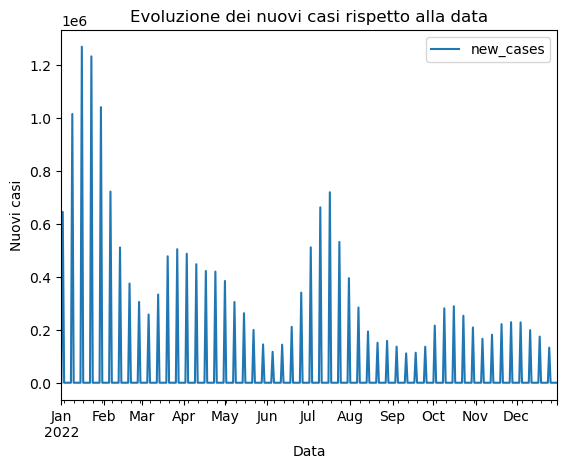

In [106]:
df_filtrato.plot()
plt.title("Evoluzione dei nuovi casi rispetto alla data")
plt.xlabel("Data")
plt.ylabel("Nuovi casi")

Per questa analisi ho sempre usato un grafico a linee così da riuscire a mostrare l’andamento nel tempo.
Si può osservare un andamento abbastanza oscillante, in cui le variazioni settimanali risultano piuttosto evidenti.
I primi mesi dell'anno 2022 registrano il picco più elevato. 
Nel corso dele settimane sembra esserci poi stata una continua alternanza di fasi di lieve crescita e decrescita.
Un ulteriore picco si può notare durante il mese di luglio, per poi avere, a partire da agosto, un calo costante, seguito da un leggero rialzo a inizio ottobre. Questo rialzo però è una crescita contenuta e senza picchi particolarmente evidenti.

4. Riguardo le nazioni di Italia, Germania, Francia:
    a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da 
    maggio 2022 (incluso) ad aprile 2023 (incluso)
    b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

In [ ]:
#Filtro il dataset per location Italia, Germania e Francia e, per periodo maggio 2022 e aprile 2023 

In [120]:
filtro_date = df["date"].between("2022-05-01", "2023-04-30")
filtro_paesi = df["location"].isin(["Italy", "Germany", "France"])
filtro = filtro_date & filtro_paesi
df_filtrato = df.loc[filtro, ["date", "location", "icu_patients",]]
df_filtrato

,date,location,icu_patients
131214,2022-05-01,France,1557.0
131215,2022-05-02,France,1511.0
131216,2022-05-03,France,1498.0
131217,2022-05-04,France,1465.0
131218,2022-05-05,France,1447.0
...,...,...,...
186482,2023-04-26,Italy,100.0
186483,2023-04-27,Italy,99.0
186484,2023-04-28,Italy,105.0
186485,2023-04-29,Italy,111.0


In [ ]:
#Rappresento con un grafico boxplot la differenza tra Italia, Germania e Francia riguardo il numero di pazienti in terapia intensiva per gli anni 2022 e 2023

Text(0, 0.5, 'Numero pazienti')

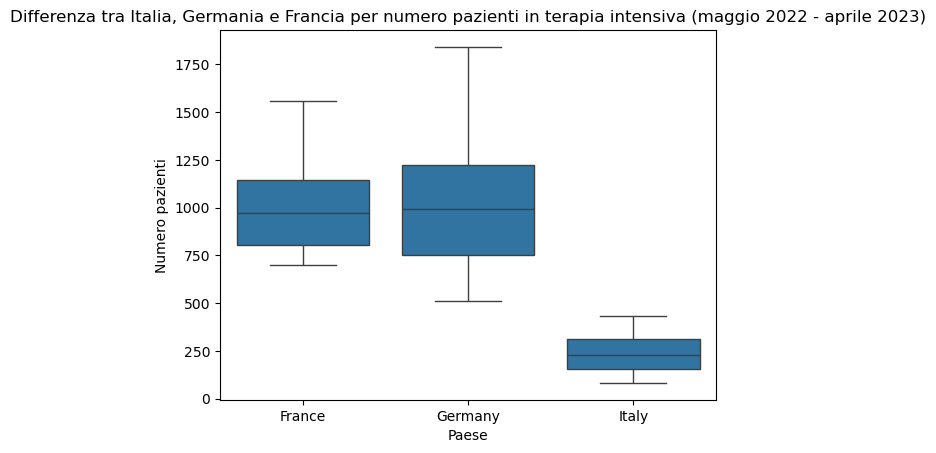

In [121]:
sns.boxplot(data = df_filtrato, x="location", y="icu_patients")
plt.title("Differenza tra Italia, Germania e Francia per numero pazienti in terapia intensiva (maggio 2022 - aprile 2023)")
plt.xlabel("Paese")
plt.ylabel("Numero pazienti")

Il grafico mostra la differenza tra Italia, Germania e Francia per il numero di pazienti in terapia intensiva nel periodo da maggio 2022 ad aprile 2023.
Il grafico è di tipo boxplot.
Dal grafico si può subito notare che non sono presenti valori outlier.
Tra i tre paesi si ha che la Germania è quello che ha registrato il valore di pazienti in terapia intensiva più alto. Questo si può dedurre dal fatto che il box presenta una maggior ampiezza dei box degli altri due paesi. Questo permette anche di dire che la Germania ha avuto una maggior variabilità. Questo può anche essere dedotto dalla lunghezza dei baffi, in particolare quello superiore. Il numero di pazienti in Germania varia tra 500 e 1800 circa, con una mediana intorno ai 1000.
La Francia, ha il box più piccolo rispetto a quello della Germania. Questo mostra una variabilità inferiore. Il numero di pazienti per la Francia varia da circa 770 a circa 1550. Anche in questo caso la mediana è intorno ai 1000, più bassa però rispetto a quella della Germania e di conseguenza anche i livelli delle terapie intensive sono mediamente inferiori.
L’Italia, è il paese che mostra i valori più bassi. Il numero di pazienti varia da circa 125 a 420, con una mediana più bassa e un box molto più stretto. Questo indica che i livelli delle terapie intensive in Italia sono stati mediamente inferiori e anche meno variabili.

5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:
    a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)
    b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzioni o meno

In [ ]:
#Mostro in maniera numerica la somma dei pazienti ospitalizzati per Italia, Germania, Francia e Spagna per l'anno 2021

In [126]:
filtro_anno = df["year"] == 2021
filtro_paesi = df["location"].isin(["Italy", "Germany", "France", "Spain"])
filtro = filtro_anno & filtro_paesi
df_filtrato = df.loc[filtro, ["date", "location", "hosp_patients"]]
df_filtrato

,date,location,hosp_patients
130729,2021-01-01,France,24263.0
130730,2021-01-02,France,24458.0
130731,2021-01-03,France,24780.0
130732,2021-01-04,France,24962.0
130733,2021-01-05,France,24871.0
...,...,...,...
363308,2021-12-27,Spain,8024.0
363309,2021-12-28,Spain,8580.0
363310,2021-12-29,Spain,8916.0
363311,2021-12-30,Spain,8982.0


In [127]:
df_aggregato = df_filtrato.groupby("location")["hosp_patients"].sum()
df_aggregato

location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64

Da questo risultato viene messo subito in evidenza il risultato ottenuto per la Germania.
Faccio un controllo per vedere quanti valori nulli sono contenuti nella colonna hosp_patients, per la location Germania per anno 2021.
Il controllo potrebbe essere evitato dato che il risultato è pari a zero, quindi il campo hosp_patients presenta valori nulli per l'anno 2021.                                                   Per essere sicuri effettuiamo però il calcolo numerico per una maggiore conferma           

In [132]:
#Germania
filtro_germania = df["location"] == "Germany"
filtro_germania_2021 = filtro_anno & filtro_germania
df_germania = df.loc[filtro_germania_2021, ["date", "location", "hosp_patients"]]
df_germania 

,date,location,hosp_patients
140773,2021-01-01,Germany,NaN
140774,2021-01-02,Germany,NaN
140775,2021-01-03,Germany,NaN
140776,2021-01-04,Germany,NaN
140777,2021-01-05,Germany,NaN
...,...,...,...
141133,2021-12-27,Germany,NaN
141134,2021-12-28,Germany,NaN
141135,2021-12-29,Germany,NaN
141136,2021-12-30,Germany,NaN


In [133]:
df_germania.isna().sum()

date               0
location           0
hosp_patients    365
dtype: int64

Come già si era dedotto in precedenza il valore di hosp_patients per l'anno 2021 per la Germania presenta tutti valori nulli.
Ci viene indicato infatti che ci sono 365 valori nulli per il campo hosp_patients e il dataframe df_germania ha un totale di 365 righe.
Non considero la Germania tra i paesi, in quanto presenta valore pari a zero e quindi non utile ai fini dell'analisi.
Per una maggiore sicurezza, effettuo un controllo sugli altri paesi.

In [ ]:
#Italia
filtro_italia = df["location"] == "Italy"
filtro_italia_2021 = filtro_anno & filtro_italia
df_italia = df.loc[filtro_italia_2021, ["date", "location", "hosp_patients"]]
df_italia

In [ ]:
df_italia.isna().sum()

In [ ]:
#Francia
filtro_francia = df["location"] == "France"
filtro_francia_2021 = filtro_anno & filtro_francia
df_francia = df.loc[filtro_francia_2021, ["date", "location", "hosp_patients"]]
df_francia

In [ ]:
df_francia.isna().sum()

In [ ]:
#Spagna
filtro_spagna = df["location"] == "France"
filtro_spagna_2021 = filtro_anno & filtro_spagna
df_spagna = df.loc[filtro_spagna_2021, ["date", "location", "hosp_patients"]]
df_spagna

In [ ]:
df_spagna.isna().sum()

In [134]:
filtro_paesi_due = df["location"].isin(["Italy", "France", "Spain"])
filtro_due = filtro_anno & filtro_paesi_due
df_filtrato_due = df.loc[filtro_due, ["date", "location", "hosp_patients"]]
df_filtrato_due

,date,location,hosp_patients
130729,2021-01-01,France,24263.0
130730,2021-01-02,France,24458.0
130731,2021-01-03,France,24780.0
130732,2021-01-04,France,24962.0
130733,2021-01-05,France,24871.0
...,...,...,...
363308,2021-12-27,Spain,8024.0
363309,2021-12-28,Spain,8580.0
363310,2021-12-29,Spain,8916.0
363311,2021-12-30,Spain,8982.0


In [162]:
df_aggregato_due = df_filtrato_due.groupby("location")["hosp_patients"].sum()
df_aggregato_due = df_aggregato_due.sort_values() 
df_aggregato_due

location
Spain     2411706.0
Italy     4419950.0
France    6008717.0
Name: hosp_patients, dtype: float64

Dall’analisi numerica si può evincere che il paese che ha registrato il numero più elevato di pazienti ospedalizzati nel 2021 è la Francia, seguita dall’Italia e infine dalla Spagna.

In [ ]:
#Mostro in maniera grafica la somma dei pazienti ospitalizzati per Italia, Francia e Spagna per l'anno 2021

In [163]:
df_aggregato_due = df_aggregato_due.reset_index()
df_aggregato_due

,location,hosp_patients
0,Spain,2411706.0
1,Italy,4419950.0
2,France,6008717.0


Text(0, 0.5, 'Numero pazienti')

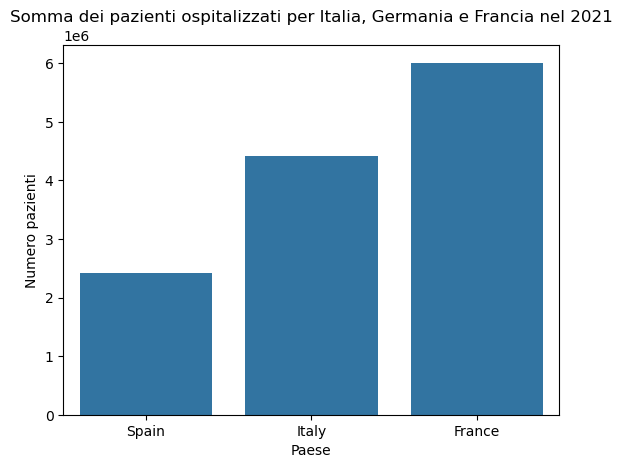

In [164]:
sns.barplot(data = df_aggregato_due, x = "location", y = "hosp_patients")
plt.title("Somma dei pazienti ospitalizzati per Italia, Germania e Francia nel 2021")
plt.xlabel("Paese")
plt.ylabel("Numero pazienti")

L’analisi grafica conferma ciò che era emerso anche dall'analisi numerica: nel 2021, la Francia è stato il paese con il maggior numero di pazienti ricoverati in ospedale a causa del COVID-19, seguita dall’Italia e infine dalla Spagna.
Il grafico a barre evidenzia chiaramente la differenza tra i tre paesi, con la Francia che presenta un numero significativamente più elevato di ricoveri rispetto agli altri.

In [ ]:
#Possibile gestione dei dati nulli

Analizzando i dati del 2021 per Italia, Germania, Francia e Spagna, ho notato che per la Germania la colonna hosp_patients, che indica il numero di persone ricoverate in ospedale, è completamente vuota, tutti i valori sono nulli.
Per gestire i valori nulli non c'è un metodo corretto, ma si deve valutare caso per caso.
Alcune soluzioni potrebbero essere:
- eliminare le righe con valori nulli
- usare metodi come ffill, bfill o interpolate per riempire i dati mancanti
- sostituire tramite fillna con un valore derivato da un’altra colonna
 
All'interno del dataset, la colonna weekly_hosp_admissions, che indica i nuovi ricoveri settimanali, è l’unica colonna che contiene un tipo di informazione che si avvicina a quella di hosp_patients. Tuttavia, usare i dati di weekly_hosp_admissions per cercare di ricostruire hosp_patients non è così immediato, e si rischierebbe di inserire valori poco realistici o comunque inventati, che non riflettono la situazione reale.
Per questo motivo, ho deciso che la cosa migliore è escludere la Germania dall’analisi sulla somma dei pazienti ospedalizzati, perché altrimenti rischierei di usare dati inventati o poco affidabili.
Quindi, in questo caso non è consigliato gestire i dati mancanti tramite sostituzione, perché non ci sono abbastanza informazioni affidabili da usare. La scelta più sicura e sensata è quella di escludere la Germania dall’analisi sulla somma dei pazienti ospedalizzati nel 2021.